In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
header_list = ['Class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 
               'node-caps', 'deg-malig', 'breast', 'breast-quad', 'irradiat']

df = pd.read_csv('breast-cancer.csv',  names=header_list, na_values='?')

In [3]:
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [4]:
df.shape

(286, 10)

In [5]:
df.isna().sum()

Class          0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      8
deg-malig      0
breast         0
breast-quad    1
irradiat       0
dtype: int64

In [6]:
df['deg-malig']

0      3
1      2
2      2
3      2
4      2
      ..
281    2
282    3
283    1
284    3
285    3
Name: deg-malig, Length: 286, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    278 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  285 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [8]:
df['Class'].value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

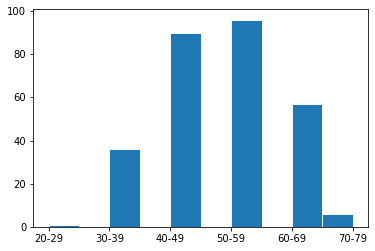

In [9]:
# plot:
fig, ax = plt.subplots()

ax.hist( df['age'].sort_values(), linewidth=0.9, edgecolor="white")


plt.savefig('figures/age_distribution.png')
plt.show()

Most of the pacients are from 40s and 50s 

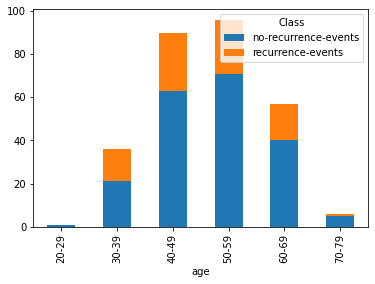

In [10]:
df.groupby(['Class', 'age']).size().reset_index().pivot(
    columns='Class', index='age', values=0).plot(kind='bar', stacked=True)

plt.savefig('figures/age_class.png')

plt.show()

In [9]:
df['menopause'].value_counts()

premeno    150
ge40       129
lt40         7
Name: menopause, dtype: int64

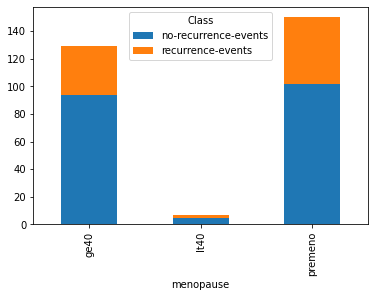

In [23]:
df.groupby(['Class', 'menopause']).size().reset_index().pivot(
    columns='Class', index='menopause', values=0).plot(kind='bar', stacked=True)

plt.savefig('figures/menopause_class.png')

plt.show()

In [19]:
df['tumor-size'].value_counts()

30-34    60
25-29    54
20-24    50
15-19    30
10-14    28
40-44    22
35-39    19
0-4       8
50-54     8
5-9       4
45-49     3
Name: tumor-size, dtype: int64

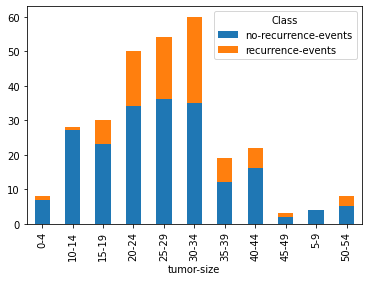

In [14]:
df.groupby(['Class', 'tumor-size']).size().reset_index().pivot(
    columns='Class', index='tumor-size', values=0).plot(kind='bar', stacked=True)

plt.savefig('figures/tumor-size_class.png')

plt.show()

In [38]:
df['tumor-size-continious'] = df['tumor-size'].apply(lambda x: int(x[-2:] if len(x)>3 else int(x[-1]) ))

In [25]:
import seaborn as sns

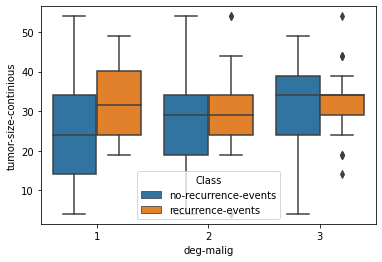

In [40]:
sns_plot = sns.boxplot(data=df, x='deg-malig', y='tumor-size-continious', hue='Class')

fig = sns_plot.get_figure()

plt.savefig('figures/malig_tumor_box.png')

In [33]:
?sns.violinplot

In [26]:
df['inv-nodes'].value_counts()

0-2      213
3-5       36
6-8       17
9-11      10
15-17      6
12-14      3
24-26      1
Name: inv-nodes, dtype: int64

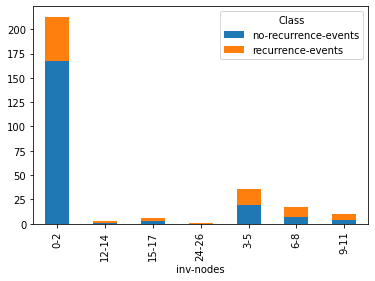

In [27]:
df.groupby(['Class', 'inv-nodes']).size().reset_index().pivot(
    columns='Class', index='inv-nodes', values=0).plot(kind='bar', stacked=True)

plt.savefig('figures/inv-nodes_class.png')

plt.show()

In [30]:
df['node-caps'].value_counts()

no     222
yes     56
?        8
Name: node-caps, dtype: int64

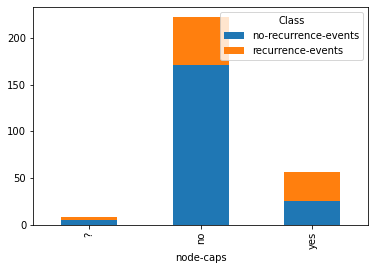

In [33]:
df.groupby(['Class', 'node-caps']).size().reset_index().pivot(
    columns='Class', index='node-caps', values=0).plot(kind='bar', stacked=True)

plt.savefig('figures/node-caps_class.png')

plt.show()

In [35]:
df['deg-malig'].value_counts()

2    130
3     85
1     71
Name: deg-malig, dtype: int64

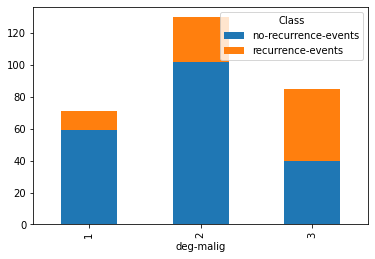

In [36]:
df.groupby(['Class', 'deg-malig']).size().reset_index().pivot(
    columns='Class', index='deg-malig', values=0).plot(kind='bar', stacked=True)

plt.savefig('figures/deg-malig_class.png')

plt.show()

In [39]:
df['breast'].value_counts()

left     152
right    134
Name: breast, dtype: int64

<AxesSubplot:>

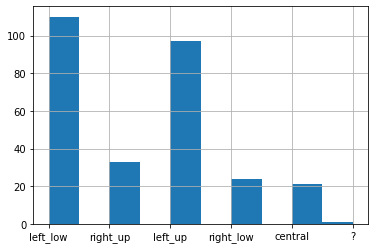

In [41]:
df['breast-quad'].hist()

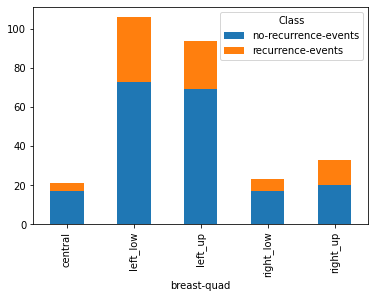

In [24]:
df['breast-quad']

df.groupby(['Class', 'breast-quad']).size().reset_index().pivot(
    columns='Class', index='breast-quad', values=0).plot(kind='bar', stacked=True)

plt.savefig('figures/breast-quad_class.png')

plt.show()

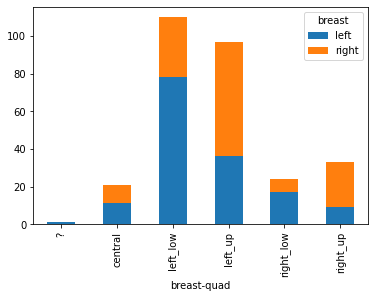

In [43]:
df.groupby(['breast', 'breast-quad']).size().reset_index().pivot(
    columns='breast', index='breast-quad', values=0).plot(kind='bar', stacked=True)

plt.savefig('figures/breast-quad_breast.png')

plt.show()

In [45]:
df['irradiat'].value_counts()

no     218
yes     68
Name: irradiat, dtype: int64

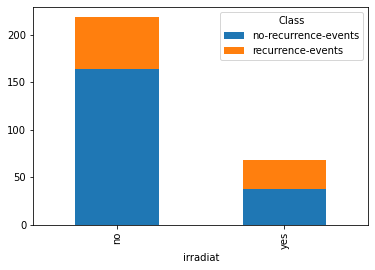

In [47]:
df.groupby(['Class', 'irradiat']).size().reset_index().pivot(
    columns='Class', index='irradiat', values=0).plot(kind='bar', stacked=True)

plt.savefig('figures/irradiat_class.png')

plt.show()

Drop NA

In [16]:
df = df.dropna()

Class
no-recurrence-events    [[AxesSubplot(0.125,0.125;0.775x0.755)]]
recurrence-events       [[AxesSubplot(0.125,0.125;0.775x0.755)]]
dtype: object

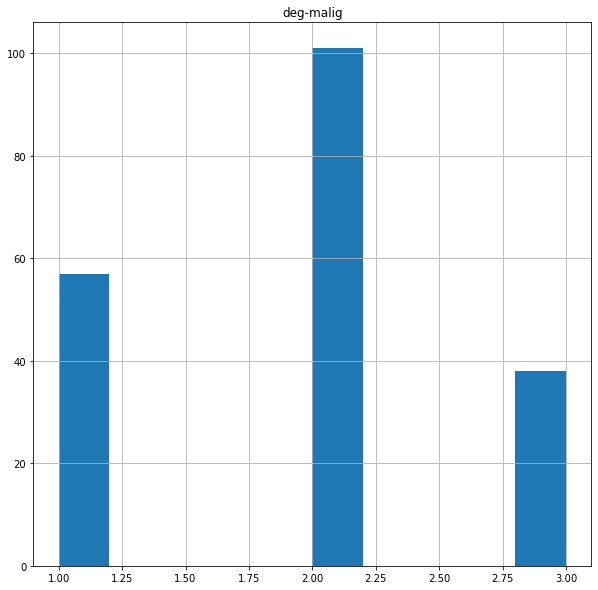

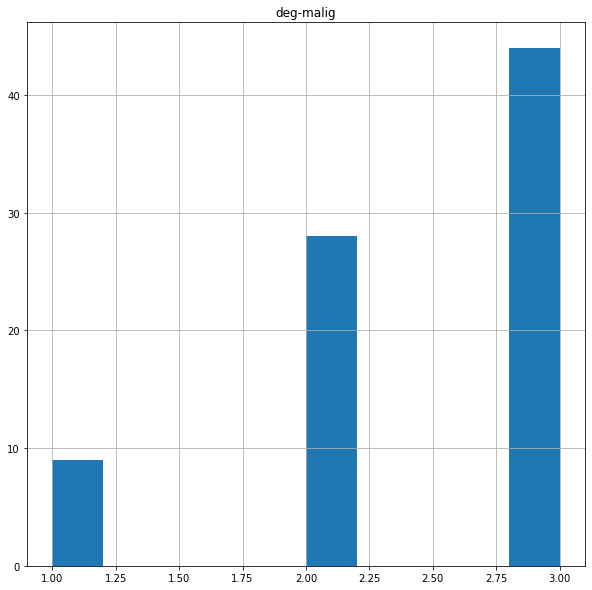

In [18]:
df.groupby('Class').hist(figsize=(10, 10))